In [1]:
import pandas as pd
from pandas import Series,DataFrame
with open('alldatasets1000.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
   
data

,formula,formation energy
0,BaB2O4,-3.105
1,LiB3O5,-2.819
2,CsLiB6O10,-2.850
3,CsB3O5,-2.820
4,KBe2BO3F2,-3.186
...,...,...
1060,La2(Ti2O7),-3.780
1061,PrZr3F15,-4.110
1062,LaF3,-4.490
1063,CdInGaS4,-0.841


In [2]:
from matminer.featurizers.conversions import StrToComposition
data = StrToComposition().featurize_dataframe(data, 'formula')
data.head()

StrToComposition:   0%|          | 0/1065 [00:00<?, ?it/s]

,formula,formation energy,composition
0,BaB2O4,-3.105,"(Ba, B, O)"
1,LiB3O5,-2.819,"(Li, B, O)"
2,CsLiB6O10,-2.850,"(Cs, Li, B, O)"
3,CsB3O5,-2.820,"(Cs, B, O)"
4,KBe2BO3F2,-3.186,"(K, Be, B, O, F)"


In [3]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
data = ep_feat.featurize_dataframe(data, col_id = 'composition')
data.head()

ElementProperty:   0%|          | 0/1065 [00:00<?, ?it/s]

,formula,formation energy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,BaB2O4,-3.105,"(Ba, B, O)",5.0,56.0,51.0,14.000000,12.000000,8.0,9.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.000000,85.714286,12.0
1,LiB3O5,-2.819,"(Li, B, O)",3.0,8.0,5.0,6.444444,1.728395,8.0,1.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
2,CsLiB6O10,-2.850,"(Cs, Li, B, O)",3.0,55.0,52.0,9.333333,5.074074,8.0,1.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
3,CsB3O5,-2.820,"(Cs, B, O)",5.0,55.0,50.0,12.222222,9.506173,8.0,5.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
4,KBe2BO3F2,-3.186,"(K, Be, B, O, F)",4.0,19.0,15.0,8.222222,2.740741,8.0,3.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,94.333333,90.148148,12.0


In [4]:
exclude = ['formula', 'composition']#, 'composition_oxid'
data_re = data.drop(exclude, axis = 1)
data_re.head()

,formation energy,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,-3.105,5.0,56.0,51.0,14.000000,12.000000,8.0,9.0,87.0,78.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.000000,85.714286,12.0
1,-2.819,3.0,8.0,5.0,6.444444,1.728395,8.0,1.0,87.0,86.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
2,-2.850,3.0,55.0,52.0,9.333333,5.074074,8.0,1.0,87.0,86.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
3,-2.820,5.0,55.0,50.0,12.222222,9.506173,8.0,5.0,87.0,82.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,87.444444,83.827160,12.0
4,-3.186,4.0,19.0,15.0,8.222222,2.740741,8.0,3.0,93.0,90.0,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,94.333333,90.148148,12.0


In [5]:
data_VT = data_re

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.96 * (1 - .96)))
sel.fit_transform(data_VT)
data_VT.shape

(1065, 133)

Optimal number of features : 104


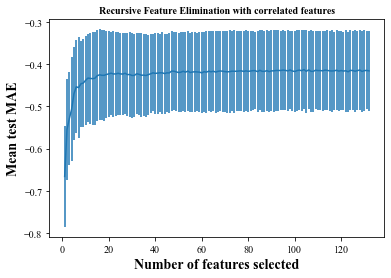

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import numpy as np
plt.rcParams['font.sans-serif']=['Times New Roman']
min_features_to_select = 1  # Minimum number of features to consider

rfr = RandomForestRegressor(random_state=42)
rfecv = RFECV(
    estimator=rfr,
    scoring = 'neg_root_mean_squared_error',
    n_jobs= -1
    
    
)
excluded = ['formation energy']
X = data_re.drop(excluded, axis = 1)
y = data_re['formation energy'].values
y = [ float(i) for i in y]
y = np.array(y,dtype=np.float32)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected",fontsize = 14,fontproperties={'weight': 'bold'})
plt.ylabel("Mean test MAE",fontsize = 14,fontproperties={'weight': 'bold'})
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features",fontsize = 14,fontproperties={'weight': 'bold'})
plt.savefig('test gbr.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()

In [7]:
rfecv.cv_results_

{'mean_test_score': array([-0.66582644, -0.55454507, -0.52918755, -0.50668499, -0.46990422,
        -0.45368986, -0.4555223 , -0.44647275, -0.44477494, -0.43838622,
        -0.4330052 , -0.43361839, -0.43440493, -0.43336985, -0.42754907,
        -0.42510285, -0.42637829, -0.42643587, -0.42445646, -0.42308364,
        -0.42144637, -0.42319749, -0.42316378, -0.42160103, -0.4231046 ,
        -0.42351043, -0.42159593, -0.42464564, -0.42458579, -0.42674231,
        -0.4266958 , -0.42261038, -0.42412569, -0.42619147, -0.42601536,
        -0.42681429, -0.4248503 , -0.4228529 , -0.42055673, -0.42186955,
        -0.42115547, -0.42052013, -0.42053385, -0.42241032, -0.42056914,
        -0.42089819, -0.41642224, -0.4166734 , -0.41827962, -0.41976471,
        -0.41905792, -0.41678729, -0.41902548, -0.41633845, -0.4197327 ,
        -0.41860681, -0.41806092, -0.41839913, -0.41889123, -0.42058584,
        -0.41795008, -0.41896473, -0.41662595, -0.41810127, -0.41674062,
        -0.41881002, -0.41694917

In [8]:
rfecv.cv_results_

{'mean_test_score': array([-0.66582644, -0.55454507, -0.52918755, -0.50668499, -0.46990422,
        -0.45368986, -0.4555223 , -0.44647275, -0.44477494, -0.43838622,
        -0.4330052 , -0.43361839, -0.43440493, -0.43336985, -0.42754907,
        -0.42510285, -0.42637829, -0.42643587, -0.42445646, -0.42308364,
        -0.42144637, -0.42319749, -0.42316378, -0.42160103, -0.4231046 ,
        -0.42351043, -0.42159593, -0.42464564, -0.42458579, -0.42674231,
        -0.4266958 , -0.42261038, -0.42412569, -0.42619147, -0.42601536,
        -0.42681429, -0.4248503 , -0.4228529 , -0.42055673, -0.42186955,
        -0.42115547, -0.42052013, -0.42053385, -0.42241032, -0.42056914,
        -0.42089819, -0.41642224, -0.4166734 , -0.41827962, -0.41976471,
        -0.41905792, -0.41678729, -0.41902548, -0.41633845, -0.4197327 ,
        -0.41860681, -0.41806092, -0.41839913, -0.41889123, -0.42058584,
        -0.41795008, -0.41896473, -0.41662595, -0.41810127, -0.41674062,
        -0.41881002, -0.41694917

In [9]:
X_rfecv = rfecv.transform(X)

df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking')

df_feature_opt = df_features[df_features['support']==True]

df_feature_opt_num = df_feature_opt['feature']

df_feature_opt_feature = []
for i in df_feature_opt_num:
    df_feature_opt_feature.append(X.columns[i])

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

In [10]:
df_feature_opt_feature1 = df_feature_opt_feature
df_feature_opt_feature1

['MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData mode Number',
 'MagpieData minimum MendeleevNumber',
 'MagpieData maximum MendeleevNumber',
 'MagpieData range MendeleevNumber',
 'MagpieData mean MendeleevNumber',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mode MendeleevNumber',
 'MagpieData minimum AtomicWeight',
 'MagpieData maximum AtomicWeight',
 'MagpieData range AtomicWeight',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mode AtomicWeight',
 'MagpieData minimum MeltingT',
 'MagpieData maximum MeltingT',
 'MagpieData range MeltingT',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData minimum Column',
 'MagpieData maximum Column',
 'MagpieData range Column',
 'MagpieData mean Column',
 'MagpieData avg_dev Column',
 'MagpieData mode Column',
 'MagpieData range Row',
 'MagpieData 

In [11]:
data_3 = data_VT[df_feature_opt_feature]
data_3

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mode GSbandgap,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,5.0,56.0,51.0,14.000000,12.000000,8.0,9.0,87.0,78.0,71.571429,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.000000,85.714286,12.0
1,3.0,8.0,5.0,6.444444,1.728395,8.0,1.0,87.0,86.0,72.444444,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
2,3.0,55.0,52.0,9.333333,5.074074,8.0,1.0,87.0,86.0,72.666667,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
3,5.0,55.0,50.0,12.222222,9.506173,8.0,5.0,87.0,82.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
4,4.0,19.0,15.0,8.222222,2.740741,8.0,3.0,93.0,90.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,94.333333,90.148148,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,8.0,57.0,49.0,19.454545,14.578512,8.0,13.0,87.0,74.0,65.545455,...,0.000,0.000023,0.000004,0.000007,12.0,194.0,182.0,78.181818,84.231405,12.0
1061,9.0,59.0,50.0,16.526316,11.883657,9.0,17.0,93.0,76.0,81.263158,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,52.684211,59.501385,15.0
1062,9.0,57.0,48.0,21.000000,18.000000,9.0,13.0,93.0,80.0,73.000000,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,59.750000,67.125000,15.0
1063,16.0,49.0,33.0,27.428571,13.061224,16.0,70.0,88.0,18.0,81.571429,...,2.202,0.000000,0.000000,0.000000,64.0,194.0,130.0,96.714286,39.877551,70.0


In [12]:
data_corr = data_VT[df_feature_opt_feature1]
data_corr

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mode GSbandgap,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,5.0,56.0,51.0,14.000000,12.000000,8.0,9.0,87.0,78.0,71.571429,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.000000,85.714286,12.0
1,3.0,8.0,5.0,6.444444,1.728395,8.0,1.0,87.0,86.0,72.444444,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
2,3.0,55.0,52.0,9.333333,5.074074,8.0,1.0,87.0,86.0,72.666667,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
3,5.0,55.0,50.0,12.222222,9.506173,8.0,5.0,87.0,82.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
4,4.0,19.0,15.0,8.222222,2.740741,8.0,3.0,93.0,90.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,94.333333,90.148148,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,8.0,57.0,49.0,19.454545,14.578512,8.0,13.0,87.0,74.0,65.545455,...,0.000,0.000023,0.000004,0.000007,12.0,194.0,182.0,78.181818,84.231405,12.0
1061,9.0,59.0,50.0,16.526316,11.883657,9.0,17.0,93.0,76.0,81.263158,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,52.684211,59.501385,15.0
1062,9.0,57.0,48.0,21.000000,18.000000,9.0,13.0,93.0,80.0,73.000000,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,59.750000,67.125000,15.0
1063,16.0,49.0,33.0,27.428571,13.061224,16.0,70.0,88.0,18.0,81.571429,...,2.202,0.000000,0.000000,0.000000,64.0,194.0,130.0,96.714286,39.877551,70.0


In [13]:
outputpath='C:/Users/WA/Desktop/1996数据.csv'
data_corr.to_csv(outputpath,sep=',',index=False,header=True)

In [14]:
data_corr_for_corr = data_corr.corr()

In [15]:
data_corr_for_corr.style.applymap(lambda v
                             : 'background-color: %s' %'#FFCCFF' if v>abs(0.5) 
                             else'background-color: %s'% '')

In [16]:
list_for = df_feature_opt_feature+['formation energy'[0:20]]

In [17]:
data_corr_for = data_VT[list_for]

In [18]:
data_corr_for = data_corr_for.apply(pd.to_numeric)   #‘formation energy’为字符串类型，先转化为数值，这里将整个df都转为了数值

In [19]:
list_corr = data_corr_for.corr()['formation energy'[0:20]].abs().sort_values(ascending=False)

In [20]:
list_corr

formation energy                        1.000000
MagpieData avg_dev Electronegativity    0.815389
MagpieData range Electronegativity      0.783312
MagpieData maximum Electronegativity    0.744592
MagpieData mode Electronegativity       0.713979
                                          ...   
MagpieData mean NdUnfilled              0.060968
MagpieData avg_dev AtomicWeight         0.043838
MagpieData avg_dev NdUnfilled           0.037224
MagpieData avg_dev Number               0.016712
MagpieData avg_dev NUnfilled            0.013027
Name: formation energy, Length: 105, dtype: float64

In [21]:
list_corr = data_VT[df_feature_opt_feature1]

In [22]:
list_corr_for_corr = list_corr.corr()

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [29]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.2, random_state=22)
crossvalidation = KFold(n_splits = 10, shuffle = True,random_state = 1)

In [30]:
rfr = RandomForestRegressor(random_state=1, max_features= 'sqrt',min_samples_leaf= 1, min_samples_split= 3, max_depth= 30)
svr = SVR(C=1200, kernel='rbf')
gbr = GradientBoostingRegressor(random_state=1, criterion='squared_error', min_samples_leaf= 10, min_samples_split= 4, max_depth= 10)

r2_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('RFR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_rfr), np.mean(r2_scores_rfr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_rfr), -np.mean(rmse_scores_rfr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_rfr), -np.mean(NAE_scores_rfr)))
print()
r2_scores_svr = cross_val_score(svr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_svr = cross_val_score(svr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_svr = cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('SVR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_svr), np.mean(r2_scores_svr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_svr), -np.mean(rmse_scores_svr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_svr), -np.mean(NAE_scores_svr)))
print()
r2_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('GBR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_gbr), np.mean(r2_scores_gbr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_gbr), -np.mean(rmse_scores_gbr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_gbr), -np.mean(NAE_scores_gbr)))
print()

rfr_test = rfr.fit(X_train, y_train)
svr_test = svr.fit(X_train, y_train)
gbr_test = gbr.fit(X_train, y_train)

y_rfr_predtct = rfr.predict(X_test)
y_svr_predtct = svr.predict(X_test)
y_gbr_predtct = gbr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_rfr_test = r2_score(y_test, y_rfr_predtct)
rmse_scores_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_predtct))
mae_scores_rfr_test = mean_absolute_error(y_test, y_rfr_predtct)

print()
print('RFR predict formation results:')
print('mean R2: %3f' % (r2_scores_rfr_test))
print('mean RMSE: %3f' % (rmse_scores_rfr_test))
print('mean MAE: %3f' % (mae_scores_rfr_test))
print()

r2_scores_svr_test = r2_score(y_test, y_svr_predtct)
rmse_scores_svr_test = np.sqrt(mean_squared_error(y_test, y_svr_predtct))
mae_scores_svr_test = mean_absolute_error(y_test, y_svr_predtct)

print()
print('SVR predict formation results:')
print('mean R2: %3f' % (r2_scores_svr_test))
print('mean RMSE: %3f' % (rmse_scores_svr_test))
print('mean MAE: %3f' % (mae_scores_svr_test))
print()

r2_scores_gbr_test = r2_score(y_test, y_gbr_predtct)
rmse_scores_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_predtct))
mae_scores_gbr_test = mean_absolute_error(y_test, y_gbr_predtct)

print()
print('GBR predict formation results:')
print('mean R2: %3f' % (r2_scores_gbr_test))
print('mean RMSE: %3f' % (rmse_scores_gbr_test))
print('mean MAE: %3f' % (mae_scores_gbr_test))
print()


RFR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.924690
Folds: 10, mean RMSE: 0.268307
Folds: 10, mean MAE: 0.186297


SVR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.858103
Folds: 10, mean RMSE: 0.365024
Folds: 10, mean MAE: 0.247537


GBR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.938216
Folds: 10, mean RMSE: 0.241663
Folds: 10, mean MAE: 0.160895


RFR predict formation results:
mean R2: 0.943192
mean RMSE: 0.244884
mean MAE: 0.171333


SVR predict formation results:
mean R2: 0.898245
mean RMSE: 0.327743
mean MAE: 0.228666


GBR predict formation results:
mean R2: 0.957187
mean RMSE: 0.212591
mean MAE: 0.141703



In [31]:
import joblib

# 假设model是你已经训练好的模型
joblib.dump(rfr, 'trained_model.pkl')

['trained_model.pkl']

In [44]:
with open('1996数据.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
data

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mode GSbandgap,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,5.0,56.0,51.0,14.000000,12.000000,8.0,9.0,87.0,78.0,71.571429,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.000000,85.714286,12.0
1,3.0,8.0,5.0,6.444444,1.728395,8.0,1.0,87.0,86.0,72.444444,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
2,3.0,55.0,52.0,9.333333,5.074074,8.0,1.0,87.0,86.0,72.666667,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
3,5.0,55.0,50.0,12.222222,9.506173,8.0,5.0,87.0,82.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,87.444444,83.827160,12.0
4,4.0,19.0,15.0,8.222222,2.740741,8.0,3.0,93.0,90.0,72.888889,...,0.000,0.000000,0.000000,0.000000,12.0,229.0,217.0,94.333333,90.148148,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,8.0,57.0,49.0,19.454545,14.578512,8.0,13.0,87.0,74.0,65.545455,...,0.000,0.000023,0.000004,0.000007,12.0,194.0,182.0,78.181818,84.231405,12.0
1061,9.0,59.0,50.0,16.526316,11.883657,9.0,17.0,93.0,76.0,81.263158,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,52.684211,59.501385,15.0
1062,9.0,57.0,48.0,21.000000,18.000000,9.0,13.0,93.0,80.0,73.000000,...,1.970,0.000000,0.000000,0.000000,15.0,194.0,179.0,59.750000,67.125000,15.0
1063,16.0,49.0,33.0,27.428571,13.061224,16.0,70.0,88.0,18.0,81.571429,...,2.202,0.000000,0.000000,0.000000,64.0,194.0,130.0,96.714286,39.877551,70.0


In [57]:
import numpy as np
from sklearn.preprocessing import StandardScaler  # 用于特征缩放

# 1. 准备新材料的特征数据（这里只是示例，你需要替换为你的数据）
new_material_features = data  # 用新材料的特征数据填充

# 2. 对特征数据进行与训练数据相同的预处理
# 假设你的模型训练时使用了StandardScaler进行特征缩放
scaler = StandardScaler()  # 创建一个标准化器对象
scaler.fit(data_corr)  # 使用训练数据来拟合标准化器
new_material_features_scaled = scaler.transform(new_material_features)  # 对新材料的特征进行标准化

# 3. 输入模型并获取预测结果
# 假设你的模型已经训练好并保存在一个文件中
import pickle

# 假设model是你已经训练好的模型
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)
# 加载已经训练好的模型文件
predicted_formation_energy = rfr.predict(new_material_features_scaled)  # 使用模型进行预测

# 打印预测结果
print("Predicted Formation Energy:", predicted_formation_energy)

Predicted Formation Energy: [-1.41895437 -1.24987704 -1.36884604 ... -1.64747937 -1.08700909
 -1.35618554]


In [58]:
import pandas as pd


In [60]:
da = pd.DataFrame([predicted_formation_energy])

In [48]:
da

,0,1,2,3,4,5,6,7,8,9,...,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064
0,-1.418954,-1.249877,-1.368846,-1.368846,-1.578941,-1.549389,-1.554441,-1.596011,-1.490877,-1.572307,...,-1.508562,-1.235997,-1.56209,-1.621894,-1.510998,-1.556766,-1.636845,-1.647479,-1.087009,-1.356186


In [49]:
daa = da.T
daa

,0
0,-1.418954
1,-1.249877
2,-1.368846
3,-1.368846
4,-1.578941
...,...
1060,-1.556766
1061,-1.636845
1062,-1.647479
1063,-1.087009


In [50]:
outputpath='C:/Users/WA/Desktop/预测出的数据03.csv'
daa.to_csv(outputpath,sep=',',index=False,header=True)

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\686493808.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


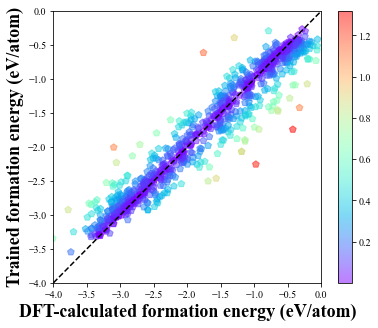

In [51]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_train], cross_val_predict(rfr, X_train, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(rfr, X_train, y_train, cv = crossvalidation)) ,cmap=colormap,marker = 'p',s = 50)
           
plt.plot(s_x, s_y,color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('Trained formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('train rfr.png', dpi = 300,bbox_inches='tight')
plt.show()

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\2409309531.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


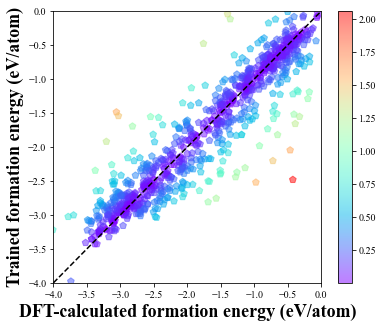

In [52]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_train], cross_val_predict(svr, X_train, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(svr, X_train, y_train, cv = crossvalidation)) ,cmap=colormap,marker = 'p',s = 50)
           
plt.plot(s_x, s_y,color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('Trained formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('train svr.png', dpi = 300,bbox_inches='tight')
plt.show()


C:\Users\WA\AppData\Local\Temp\ipykernel_7560\1488162349.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


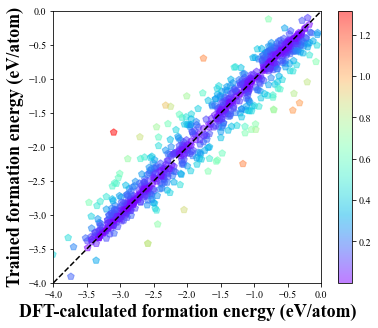

In [53]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_train], cross_val_predict(gbr, X_train, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(gbr, X_train, y_train, cv = crossvalidation)) ,cmap=colormap,marker = 'p',s = 50)
           
plt.plot(s_x, s_y,color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('Trained formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('train gbr.png', dpi = 300,bbox_inches='tight')
plt.show()

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\94028031.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


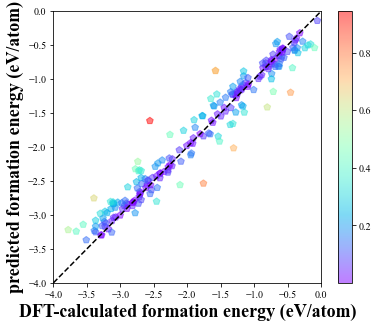

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_rfr_predtct], alpha = 0.5,
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_rfr_predtct])) ,cmap=colormap,marker = 'p',s = 50)
plt.plot(s_x, s_y, color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('predicted formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('test rfr.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()


C:\Users\WA\AppData\Local\Temp\ipykernel_7560\2976552517.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


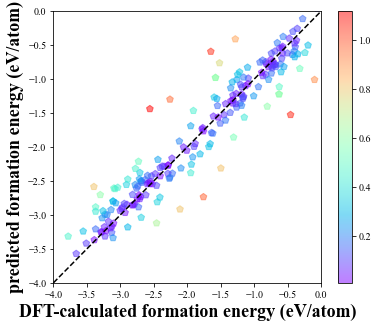

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_svr_predtct], alpha = 0.5, 
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_svr_predtct])),cmap=colormap,marker = 'p',s = 50)
plt.plot(s_x, s_y, color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('predicted formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('test svr.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()

C:\Users\WA\AppData\Local\Temp\ipykernel_7560\3941095153.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow')


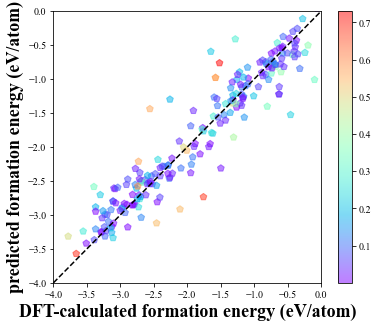

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(-4, 0, 100)
s_y = s_x
colormap = cm.get_cmap('rainbow')
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_svr_predtct], alpha = 0.5, 
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_gbr_predtct])),cmap=colormap,marker = 'p',s = 50)
plt.plot(s_x, s_y, color ='black')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.ylabel('predicted formation energy (eV/atom)', fontsize = 18,fontproperties={'weight': 'bold'})
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.colorbar()
plt.savefig('test svr.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()